## <Center>本节课知识点提炼</Center>


### 本节课重点与难点
* 重点：风格、内容重构；Content/Style Loss；代码实践；
* 难点：Content/Style Loss

*图像风格转换论文：* [A Neural Algorithm of Artistic Style](https://arxiv.org/pdf/1508.06576.pdf)

#### 1.概述

   论文中提出基于深度学习的算法，将画的内容(Content)和风格(Style)区分开来。将一幅画的Style和另一幅画的Content合并为新的画；  
流程框图如下所示

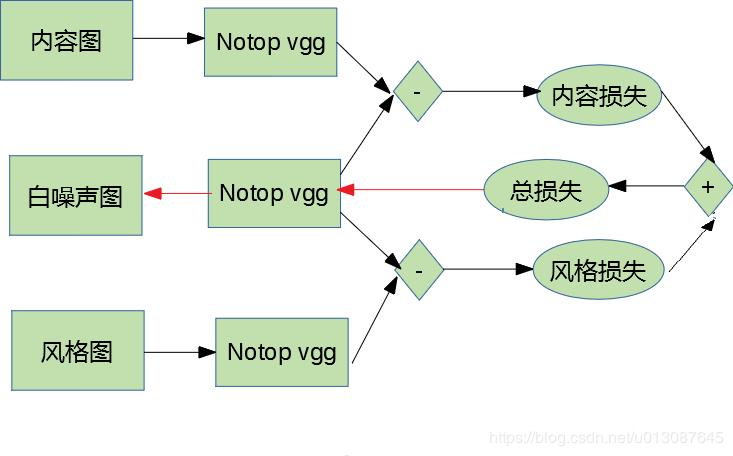

    通过不带全连接层的vgg网络分别抽取内容图、风格图以及生成图的特征图，然后分别用内容特征和生成特征图计算内容损失，用风格图和生成图计算风格损失，将两个损失合起来，作为总体损失，用总体损失来计算生成图的梯度然后更新生成图。生成图最初初始化为白噪声图；VGG用ImageNet预训练模型   
    作者的想法是想通过VGG分别抽取内容图的特征图、风格的特征图；根据生成图的内容与内容图的差异来优化内容特征；用生成图与风格图的差异来优化风格特征。因此上面框图中最上面的网络和最下面的网络实际只需运行一次，中间网络要跑N次，但在这N次中只优化生成图不会优化网络参数。

如下图所示，输入内容图片和风格图片，在abcde五层处分别重构风格图片和内容图片：

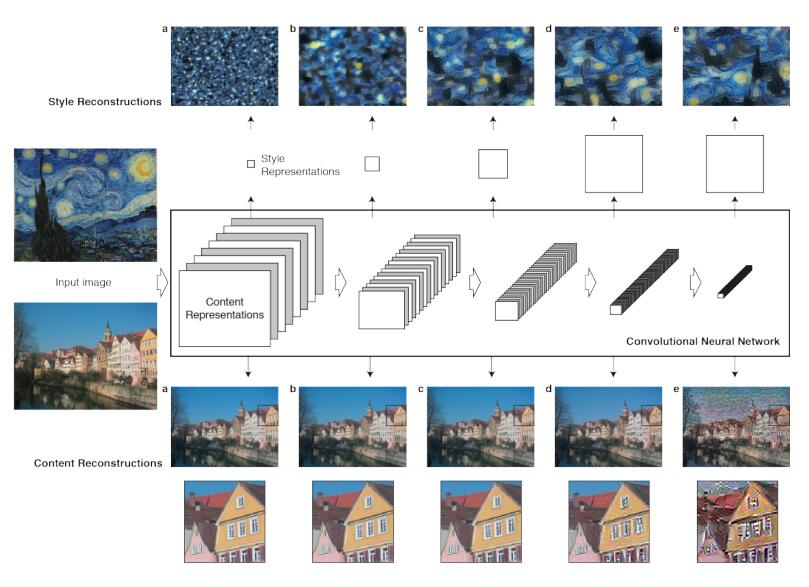

* 内容重构(Content Reconstruction)  
   (a)conv1_1，(b) conv2_1，(c)conv3_1，(d)conv4_1，(e)conv5_1  
   可以看出，在高层(d，e)，细节像素信息丢失，但内容保留，所以内容特征一般用高层;  
   上图中下面部分是Content Reconstruction对应于CNN中的a，b，c，d，e层，注意最开始标了Content Representations的部分不是原始图片，而是经过Pre-trained VGG后输出的图像数据，VGG用来生成图像的Content Representations；经过五层卷积网络来做Content的重构，文章作者实验发现在前3层的Content Reconstruction效果比较好，d，e两层丢失了部分细节信息，保留了比较high-level的信息。   
* 风格重构(Style Reconstruction):  
  感受野大小和特征复杂程度随着网络层级增大，当风格表示匹配到网络的更高层时，局部图像结构在越来越大的范围内匹配，从而导致更平滑和更连接的视觉效果; Style Represention的生成也是和Content Representation的生成类似，也是由VGG network model去做的，不同点在于a,b,c,d,e的处理方式不同，Style Represention的Reconstruction是在CNN的不同的子集上来计算的;  
  (a)conv1_1，  
  (b)conv1_1， conv2_1，   
  (c)conv1_1， conv2_1，conv3_1，   
  (d)conv1_1， conv2_1，conv3_1，conv4_1，  
  (e)conv1_1， conv2_1，conv3_1，conv4_1，conv5_1;   
  这样重构的Style会在各个不同的尺度上更加匹配图像本身的style，忽略场景的全局信息。  


#### 2.内容损失(Content Loss)

   输入 $x,$ 在网络中某一层的输出为，shape可以表示为
$
N_{l} \times H \times W
$
, reshape为 $N_{I} \times M_{l},$ 写作矩阵 $F^{l}$ 。其中 $N_{l}$ 表示该层卷积核的个数， $M_{l}$ 是该层Feature的长度 $H$ 和宽度 $W$ 的乘积。 $F_{i j}^{l}$ 表示 $l$ 层第i个filter的位置 $j$ 内容损失就是原始图像和生成图片经过VGG19网络后，在这一层feature上的squared-error loss  
$$
L_{\text {content}}=\frac{1}{2} \sum_{i, j}\left(F_{i j}^{l}-P_{i j}^{l}\right)^{2}
$$

#### 3风格损失(Style Loss)  
先引入Gram matrix $G^{l} \in R^{N_{l} \times N_{l}}$, 由矩阵$F^{l}$和其转置矩阵的相乘得到. $G_{i j}^{l}$是第l层的feature i向量和 feature j向量的内积。
$$
\begin{array}{c}
E_{l}=\frac{1}{4 N_{l}^{2} M_{l}^{2}} \sum_{i j}\left(G_{i j}^{l}-F_{i j}^{l}\right)^{2} \\
L_{style}=\sum_{l=0}^{L} w_{l} E_{l}
\end{array}

#### 4.总损失  

$$ L_{total}=\alpha L_{content}+\beta L_{style} $$

$\alpha$ 和 $\beta$ 表示权重，调节内容和风格的比重。  
文章中使用 $\frac{a}{\beta}=10^{-3}(下图：\mathrm{B}, \mathrm{C}, \mathrm{D})$ 更加注重原图，或者10^-4 (下图：E,F)更加艺术化。

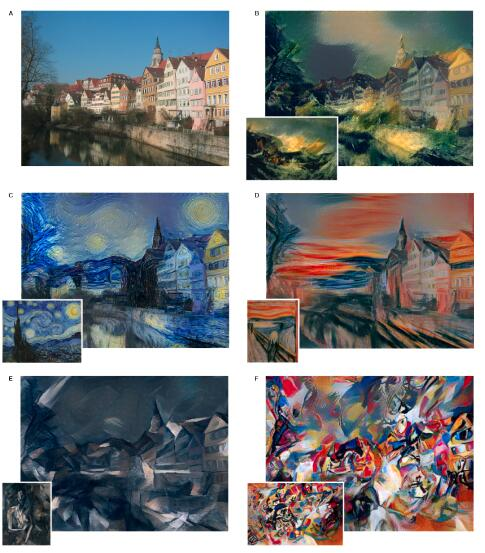

#### 5.图像风格化-代码实现

查看ipynb文件